In [1]:
import os
import pandas as pd
import joblib

from sklearn.feature_extraction.text import HashingVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load data

In [13]:
not_obfuscated_path = "/content/drive/MyDrive/Colab Notebooks/simple NLP projects/dataset/ObfuscationJS_detection_Dataset/JavascriptSamplesNotObfuscated/JavascriptSamples"
obfuscated_path = "/content/drive/MyDrive/Colab Notebooks/simple NLP projects/dataset/ObfuscationJS_detection_Dataset/JavascriptSamplesObfuscated/JavascriptSamplesObfuscated"

In [14]:
js = []
labels = []
file_types_and_labels = [(not_obfuscated_path,0), (obfuscated_path, 1)]

In [15]:
for files_path, label in file_types_and_labels:
    files = os.listdir(files_path)
    for file in files:

        file_path = files_path + "/" + file
        try:
            with open(file_path, "r") as myfile:
                data = myfile.read().replace("\n", "")
                data = str(data)
                js.append(data)
                labels.append(label)
        except Exception as e:
            print(e)

In [16]:
df = pd.DataFrame({"js": js, "label": labels})
df.head()

,js,label
0,'use strict';require('../common');const runBen...,0
1,'use strict';const common = require('../common...,0
2,'use strict';const common = require('../common...,0
3,'use strict';require('../common');const assert...,0
4,'use strict';const common = require('../common...,0


<Axes: ylabel='count'>

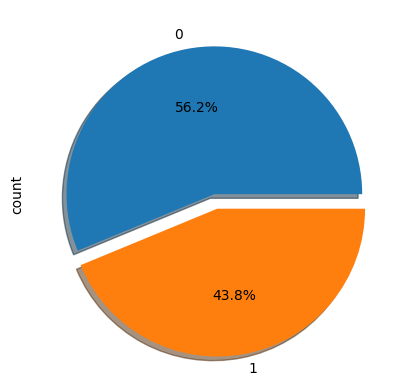

In [17]:
df["label"].value_counts().plot(kind="pie", autopct="%.1f%%", shadow=True, explode=[0, 0.1])

# **Preprocess**

In [18]:
x = df["js"]
y = df["label"]

HashingVectorizer is a feature extraction technique in NLP that converts text into a fixed-length numerical vector using a hashing function. It is an alternative to TfidfVectorizer and CountVectorizer but does not require storing a vocabulary, making it memory-efficient


What Does ngram_range=(1, 3) Do?
ngram_range=(1,3) means it considers:

Unigrams (single words) → "This", "is", "a"

Bigrams (two-word combinations) → "This is", "is a"

Trigrams (three-word combinations) → "This is a", "is a sample"

This helps capture contextual meaning instead of treating words independently

In [19]:
hv = HashingVectorizer(ngram_range=(1, 3))
X = hv.fit_transform(x)


In [20]:
# Save the HashingVectorizer
joblib.dump(hv, 'hashing_vectorizer.pkl')

['hashing_vectorizer.pkl']

In [21]:
tfidf = TfidfTransformer()
X= tfidf.fit_transform(X)
#X_test = tfidf.transform(X_test)

In [22]:
joblib.dump(tfidf, 'tfidf_transformer.pkl')

['tfidf_transformer.pkl']

In [23]:
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3316173 stored elements and shape (3375, 1048576)>
  Coords	Values
  (0, 31122)	0.05368110107695765
  (0, 49665)	0.10732951156270618
  (0, 107752)	-0.12353502927964638
  (0, 120299)	-0.02424833558526095
  (0, 147978)	-0.15214617958787408
  (0, 166116)	0.16400700967772136
  (0, 197800)	-0.17010431474810556
  (0, 198687)	-0.17010431474810556
  (0, 199328)	-0.11803479454285064
  (0, 201189)	0.09849361614919862
  (0, 212275)	0.09475015180862106
  (0, 215994)	0.11574125142183488
  (0, 259208)	0.17010431474810556
  (0, 271559)	0.11803479454285064
  (0, 279276)	-0.11864917365257031
  (0, 314626)	0.11864917365257031
  (0, 332728)	-0.032132540408242344
  (0, 394579)	-0.17010431474810556
  (0, 395243)	0.052329593413904744
  (0, 399932)	0.10807325788095339
  (0, 408816)	-0.08436945796138336
  (0, 409166)	0.11685701404259541
  (0, 411114)	0.16400700967772136
  (0, 452614)	-0.08926722584795652
  (0, 465064)	-0.15927757243731175
  :	:
  (

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (2700, 1048576)
X_test: (675, 1048576)
y_train: (2700,)
y_test: (675,)


In [26]:
print(y_test)

3211    1
952     0
3068    1
139     0
3194    1
       ..
3048    1
3321    1
1361    0
2623    1
679     0
Name: label, Length: 675, dtype: int64


# Training Loistic regression model

In [28]:
import time
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve, recall_score, auc, roc_auc_score, roc_curve, precision_score, f1_score
from mlxtend.plotting import plot_confusion_matrix
#from scikitplot.metrics import plot_cumulative_gain, plot_precision_recall, plot_roc_curve

In [29]:
logreg = LogisticRegression()
start = time.time()
logreg.fit(X_train, y_train)
end = time.time()
logreg_time = end - start
print("Logistic Regression Train Time:", logreg_time)

Logistic Regression Train Time: 7.357934951782227


In [30]:
logreg_pred_test = logreg.predict(X_test)
logreg_test_score = accuracy_score(logreg_pred_test, y_test)
print("Logistic Regression Test Score:", logreg_test_score)

Logistic Regression Test Score: 0.9614814814814815


# Train XGB model

In [31]:
xgb = XGBClassifier()
start = time.time()
xgb.fit(X_train, y_train)
end = time.time()
xgb_time = end - start
print("XGBClassifier Train Time:", xgb_time)

XGBClassifier Train Time: 129.84208989143372


In [32]:
xgb_pred_test = xgb.predict(X_test)
xgb_test_score = accuracy_score(xgb_pred_test, y_test)
print("XGBClassifier Test Score:", xgb_test_score)

XGBClassifier Test Score: 0.9807407407407407


## Model evaluation

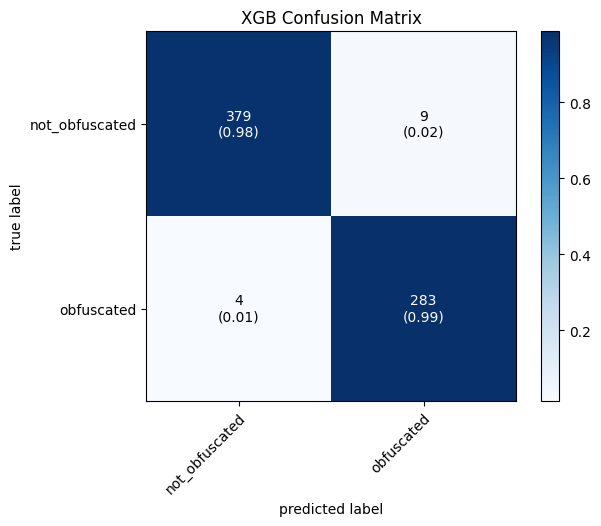

In [33]:
xgb_cm = confusion_matrix(y_test, xgb_pred_test)
fig, ax = plot_confusion_matrix(conf_mat=xgb_cm, show_absolute=True, show_normed=True, colorbar=True, class_names=["not_obfuscated","obfuscated"])
plt.title("XGB Confusion Matrix")
plt.show()

In [34]:
print(classification_report(y_test, xgb_pred_test, target_names=["not_obfuscated","obfuscated"]))

                precision    recall  f1-score   support

not_obfuscated       0.99      0.98      0.98       388
    obfuscated       0.97      0.99      0.98       287

      accuracy                           0.98       675
     macro avg       0.98      0.98      0.98       675
  weighted avg       0.98      0.98      0.98       675



In [35]:
# Save the model to a file
joblib.dump(xgb, 'xgb_model.pkl')

['xgb_model.pkl']

# infernce

In [37]:
# Load the HashingVectorizer
hv_loaded = joblib.load('/content/hashing_vectorizer.pkl')
tfidf_loaded = joblib.load('/content/tfidf_transformer.pkl')
model=joblib.load("/content/xgb_model.pkl")

In [38]:
normal_js = """document.addEventListener('DOMContentLoaded', function () { var checkButton = document.getElementById('checkButton');var contentInput = document.getElementById('content');var resultElement = document.getElementById('result');checkButton.addEventListener('click', function () {var content = contentInput.value;var data = { content: content }; fetch('http://localhost:5000/check-spam', {method: 'POST',headers: {'Content-Type': 'application/json'},body: JSON.stringify(data)}).then(response => response.json()).then(result => {if (result.spam) {resultElement.textContent = 'SPAM';} else {resultElement.textContent = 'NOT SPAM';}}).catch(error => {console.error('Error:', error);});});});"""

In [39]:
df.iloc[3274,:]

,3274
js,"var _0x4a8e=['kr.','$provide','zero','one','tw..."
label,1


In [40]:
df.at[3274,"js"]

"var _0x4a8e=['kr.','$provide','zero','one','two','few','many','other','min','pow','value','$locale','søndag','mandag','tirsdag','onsdag','torsdag','lørdag','f.Kr.','e.Kr.','januar','februar','april','maj','juli','august','september','oktober','november','december','ons.','tor.','fre.','lør.','jan.','feb.','mar.','jun.','jul.','aug.','sep.','okt.','dec.','marts','juni','EEEE\\x20\\x27den\\x27\\x20d.\\x20MMMM\\x20y','d.\\x20MMMM\\x20y','d.\\x20MMM\\x20y\\x20HH.mm.ss','HH.mm.ss','dd/MM/y','HH.mm'];(function(_0x5e4990,_0x5d06e5){var _0x2efbb3=function(_0x2aa110){while(--_0x2aa110){_0x5e4990['push'](_0x5e4990['shift']());}};_0x2efbb3(++_0x5d06e5);}(_0x4a8e,0x67));var _0x16c4=function(_0x7b2935,_0x15d37e){_0x7b2935=_0x7b2935-0x0;var _0x7bb0b5=_0x4a8e[_0x7b2935];return _0x7bb0b5;};'use strict';angular['module']('ngLocale',[],[_0x16c4('0x0'),function(_0x48760d){var _0x458ef8={'ZERO':_0x16c4('0x1'),'ONE':_0x16c4('0x2'),'TWO':_0x16c4('0x3'),'FEW':_0x16c4('0x4'),'MANY':_0x16c4('0x5'),'OTHER':_0x

In [41]:
class_names=["not_obfuscated","obfuscated"]

test_normal = hv_loaded .transform([df.at[3274,"js"]])
test_normal = tfidf_loaded.transform(test_normal)
result_array = model.predict(test_normal)
print("Result: ", class_names[result_array[0]])

Result:  obfuscated
